**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
# here the data is already preprocessed
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)  # numpy n dimemsional array

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000
Test data = 10,000

Image dimenstion --> 28 X 28
Grayscale Image --> 1 Channel

In [5]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


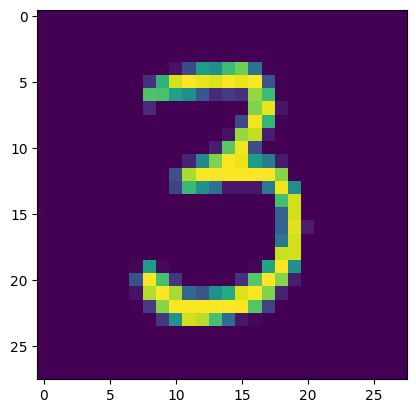

3


In [7]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

Image Labels

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# uniquw values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

if label is 0 -> [1 0 0 0 0 0 0 0 0 0]

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimensions

In [10]:
# scaling the values -> also called normalization

X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [12]:
# setting up the layers of the Neural Network

model = keras.Sequential([
          keras.layers.Flatten(input_shape =(28,28)),
          keras.layers.Dense(50, activation='relu'),
          keras.layers.Dense(50, activation='relu'),
          keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [14]:
# training the neural network 

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2983 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1449 - accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1049 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0830 - accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0586 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

training data accuracy = 99.17%

**Accuracy on Test data**

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9725
0.9725000262260437


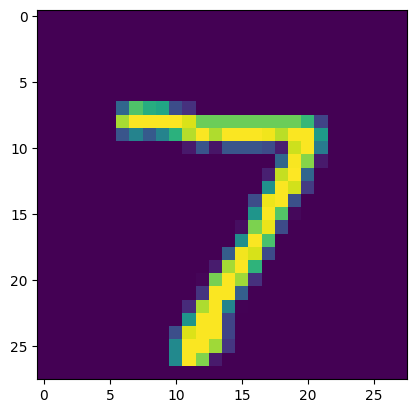

In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[2.1775070e-04 2.1513530e-05 1.9482280e-01 6.8234044e-01 5.9306499e-06
 1.2147364e-02 6.7056334e-12 9.9996728e-01 1.5530951e-01 3.8336474e-01]


model.predict() gives the prediction probability of each class for that data point

In [22]:
# converting the prediction probabilities to the class label

label_for_the_first_test_image = np.argmax(Y_pred[0])
print(label_for_the_first_test_image)

7


In [23]:
# converting the prediction probabilities to the class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test -> True labels
Y_pred_labels -> predicted labels

**confusion_matrix**

In [24]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 963    0    3    3    0    5    3    1    2    0]
 [   0 1122    1    1    0    1    2    1    7    0]
 [   4    3  997    6    2    3    4    5    8    0]
 [   0    0    3  983    2    8    0    6    4    4]
 [   0    0    2    0  950    4    6    4    2   14]
 [   2    0    0    6    1  876    2    0    3    2]
 [   3    1    2    2    3   21  925    0    1    0]
 [   1    3    7    8    0    1    0  995    1   12]
 [   1    1    1    6    4   20    0    2  932    7]
 [   2    3    0    6    6    2    0    6    2  982]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

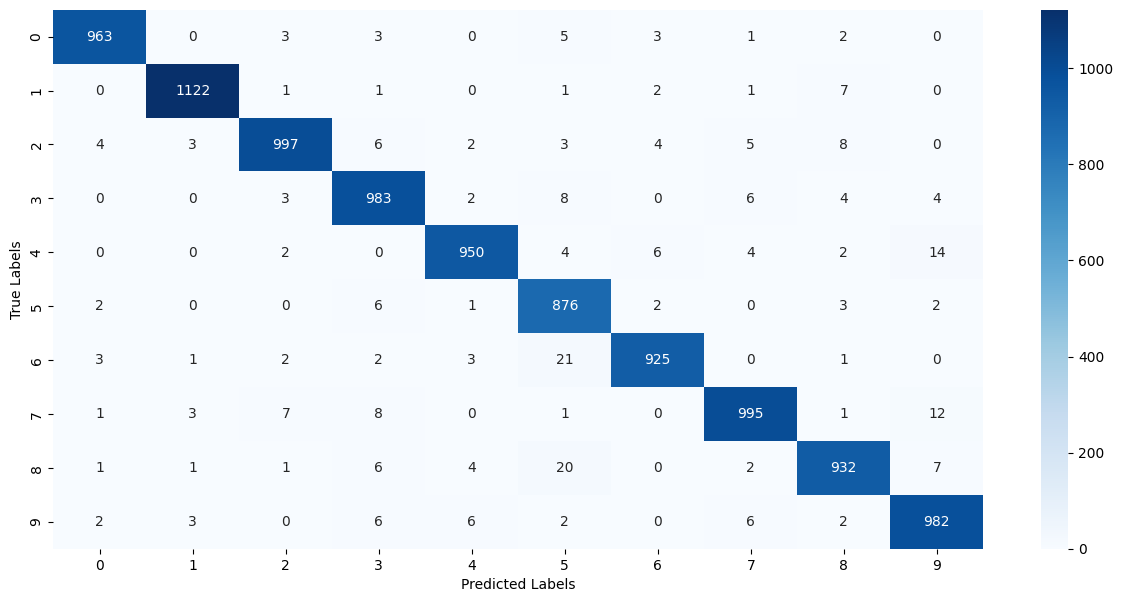

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building the predictive system**

In [36]:
input_image_path = 'testinput.png'

input_image = cv2.imread(input_image_path)


In [37]:
type(input_image)

numpy.ndarray

In [38]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


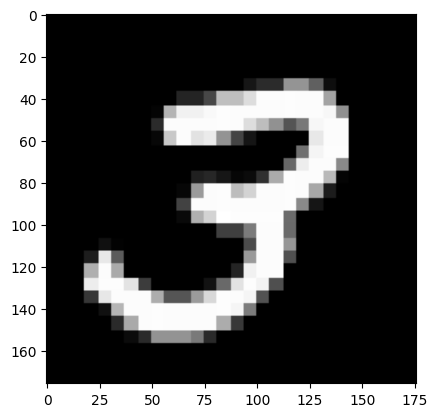

In [39]:
plt.imshow(input_image)
plt.show()

In [40]:
input_image.shape

(176, 176, 3)

In [41]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [42]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [43]:
input_image_resize.shape

(28, 28)

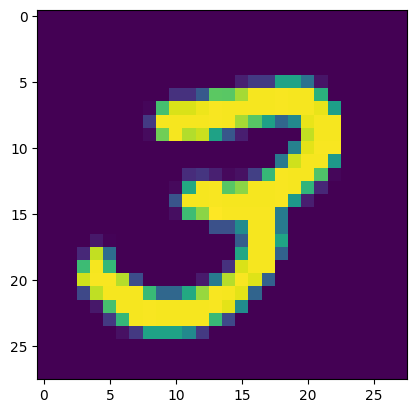

In [44]:
plt.imshow(input_image_resize)

In [45]:
input_image_resize = input_image_resize/255

In [46]:
type(input_image_resize)

numpy.ndarray

In [47]:
# here we are not predicting for only one data point (1, -1)
# here we are predicting for imgae

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [48]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 72ms/step
[[3.2675462e-09 1.3010437e-04 2.2926141e-01 1.0000000e+00 1.1928558e-10
  1.4863852e-02 2.3593327e-16 1.0958956e-07 4.1749008e-02 1.2066322e-04]]


In [49]:
input_pred_label = np.argmax(input_prediction)

In [50]:
print(input_pred_label)

3


**Predictive System**

1/1 [==============================] - 0s 59ms/step
The handwritten digit is recognized as:  3


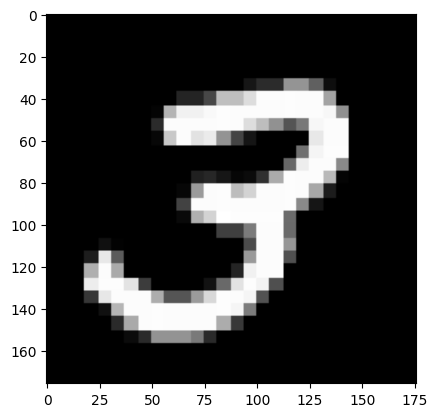

In [53]:
input_image_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_imae_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1, 28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The handwritten digit is recognized as: ", input_pred_label)